Google Colab上執行  
使用Lena，放在google colab的sample_data目錄下後再進行存取  
SourceCode@Google Colab: https://colab.research.google.com/drive/1YrO32KHgq_rKC3pWurKwhzJCjdL032zB

In [0]:
# _*_ coding: utf-8 _*_
# _*_ coding: cp950 _*_

# author: Chi-Hsu Chen (css920@gmail.com)
# datetime: 20200530

import numpy as np
import cv2
import time
from google.colab.patches import cv2_imshow

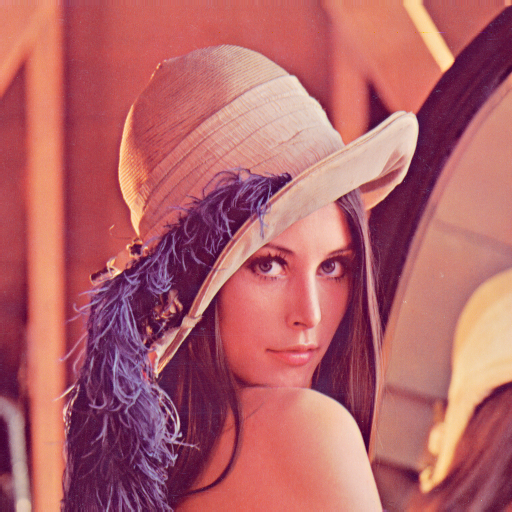

In [35]:
# 顯示原圖
imgLenaColor=cv2.imread('sample_data/lena.png')
cv2_imshow(imgLenaColor)

#翻轉：實作上下左右的翻轉

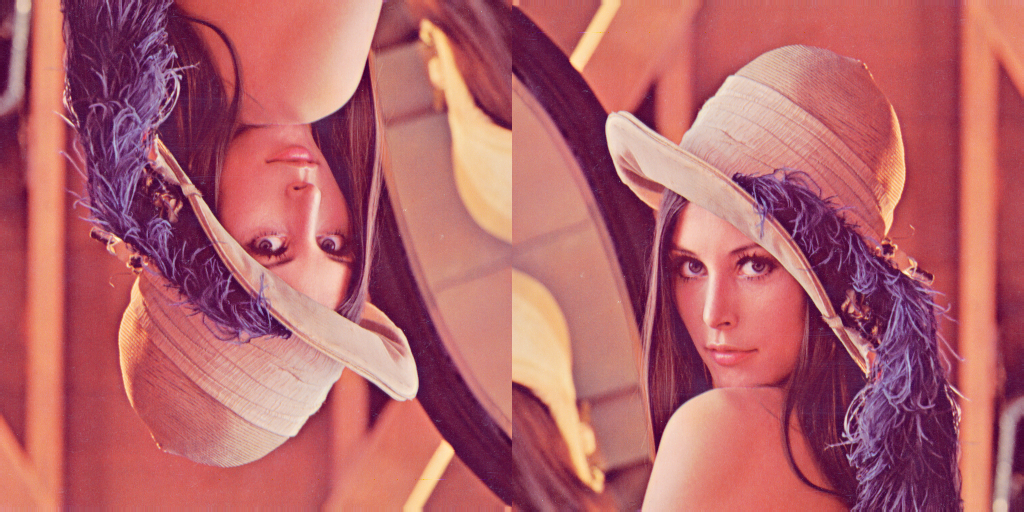

In [36]:
imgVerticalFlip=imgLenaColor[::-1,:,:]          # 陣列操作，沿著x軸順序翻轉即可達成垂直翻轉
imgHorizontalFlip=imgLenaColor[::,::-1,:]       # 陣列操作，沿著y軸順序翻轉即可達成水平翻轉
imgBothFlip=np.hstack((imgVerticalFlip,imgHorizontalFlip))

cv2_imshow(imgBothFlip)


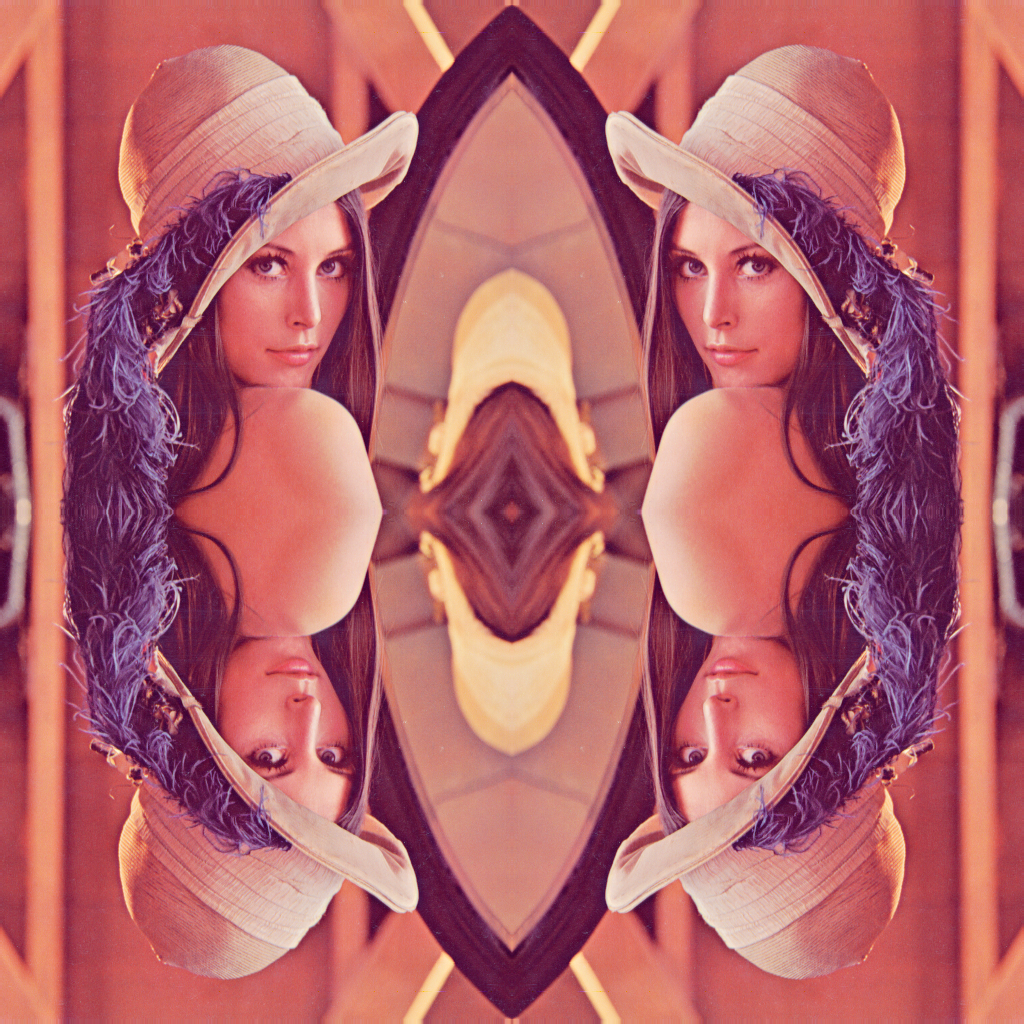

In [37]:
# 原圖再加上水平翻換，接下來組合成一張後，進行垂直翻轉
imgOriginalAndHorizontal=np.hstack((imgLenaColor,imgHorizontalFlip))
imgFlipViaVertical=imgOriginalAndHorizontal[::-1,:,:]
imgCombined=np.vstack((imgOriginalAndHorizontal,imgFlipViaVertical))

cv2_imshow(imgCombined)


#縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質

Resize to scale 0.2


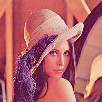

Resize to scale 8 by samller image


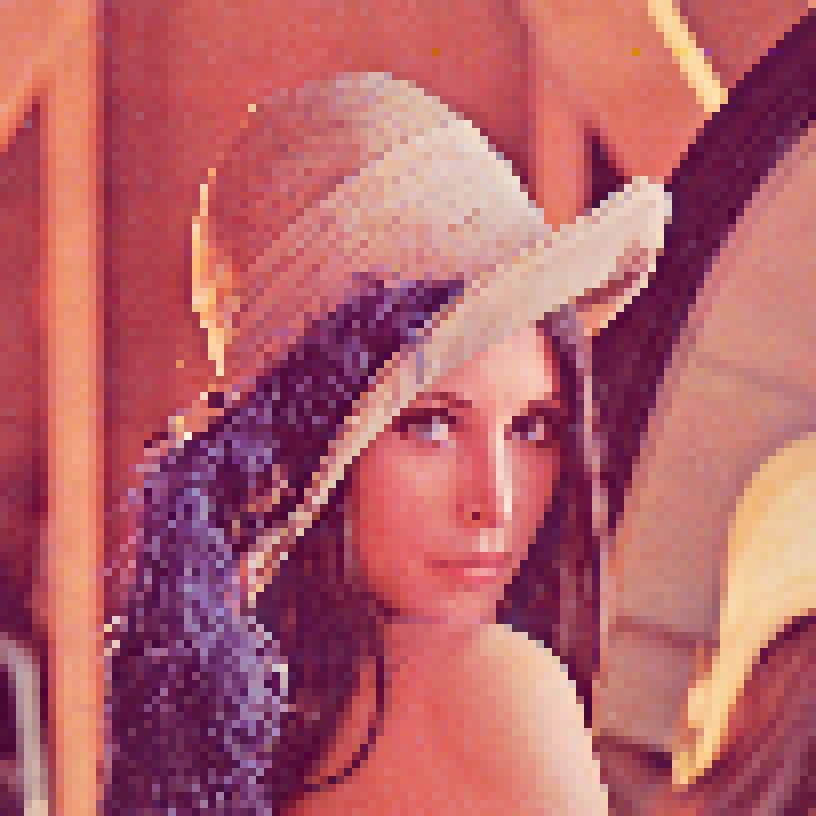

elapsed time for INTER_AREA = 0.0553898811340332


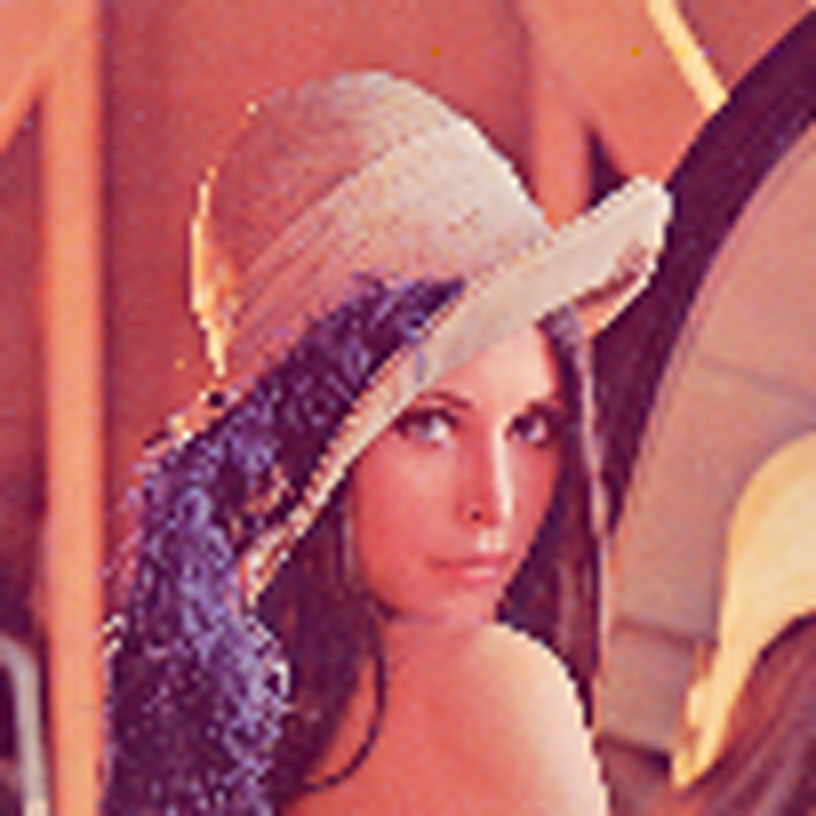

elapsed time for INTER_CUBIC = 0.42436790466308594


In [38]:
imgLenaReisze=cv2.resize(imgLenaColor,None,fx=0.2,fy=0.2)

print('Resize to scale 0.2')
cv2_imshow(imgLenaReisze)

print('Resize to scale 8 by samller image')
fx,fy=8,8

starttime=time.time()
imgLenaResizeByINTER_AREA=cv2.resize(imgLenaReisze,None,fx=fx,fy=fy,interpolation=cv2.INTER_AREA)
cv2_imshow(imgLenaResizeByINTER_AREA)
print('elapsed time for INTER_AREA = {}'.format(time.time()-starttime))

starttime=time.time()
imgLenaResizeByINTER_CUBIC=cv2.resize(imgLenaReisze,None,fx=fx,fy=fy,interpolation=cv2.INTER_CUBIC)
cv2_imshow(imgLenaResizeByINTER_CUBIC)
print('elapsed time for INTER_CUBIC = {}'.format(time.time()-starttime))


#平移：建立 Translation Transformation Matrix 來做平移

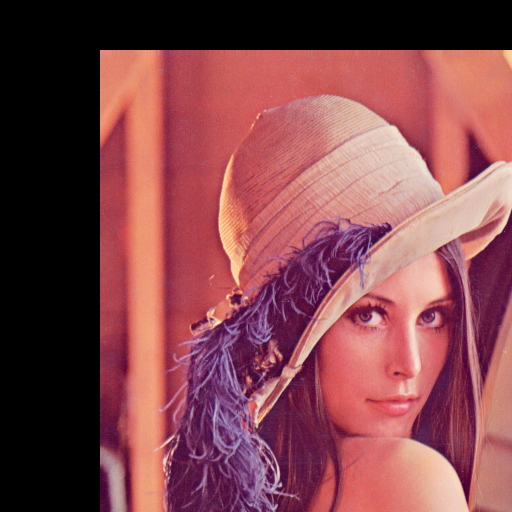

In [39]:
# 平移矩陣
# [[1,0,tx],   => tx代表x軸位移
# [0,1,ty]]   => ty代表y軸位移

M=np.array([[1,0,100],[0,1,50]],np.float32)    # 構造平移矩陣,x軸位移100,y軸位移50
imgLenaShift=cv2.warpAffine(imgLenaColor,M,(imgLenaColor.shape[1],imgLenaColor.shape[0]))

cv2_imshow(imgLenaShift)